# 第15章 OpenCVの利用と画像データの前処理

In [15]:
import time

import cv2
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline

def aidemy_imshow(name, img):
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])

    plt.imshow(img)
    plt.show()
    
cv2.imshow = aidemy_imshow


## 15.2 OpenCVの基礎

## 15.2.1 画像の読み込み・表示

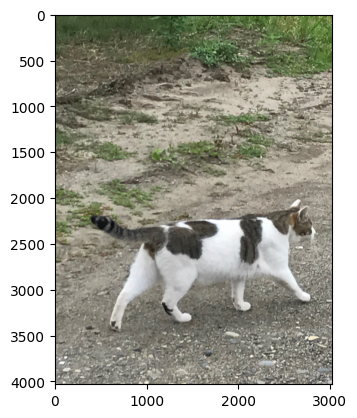

In [16]:
import cv2
import numpy as np

img = cv2.imread('cleansing_data/sample.jpg')

cv2.imshow('sample', img)

### 15.2.2 画像の作成・保存

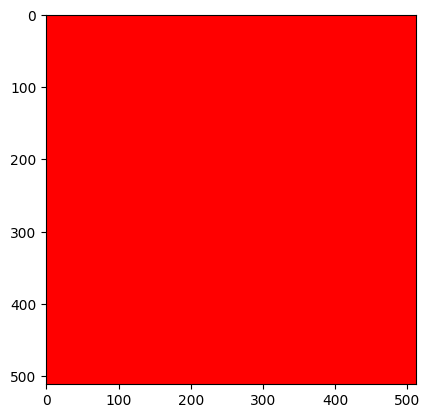

True

In [17]:
import numpy as np
import cv2


img_size = (512, 512)

my_img = np.array([ [ [0, 0, 255] for _ in range(img_size[1]) ] for _ in range(img_size[0]) ], dtype='uint8')

cv2.imshow('sample', my_img)

cv2.imwrite('my_red_img.jpg', my_img)

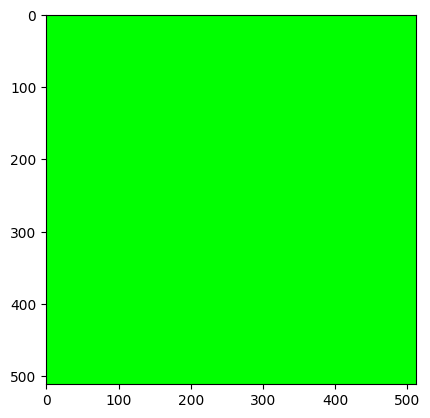

In [18]:
import numpy as np
import cv2


img_size = (512, 512)

my_img = np.array([ [ [0, 255, 0] for _ in range(img_size[1]) ] for _ in range(img_size[0]) ], dtype='uint8')

cv2.imshow('sample', my_img)

### 15.2.3 トリミングとリサイズ

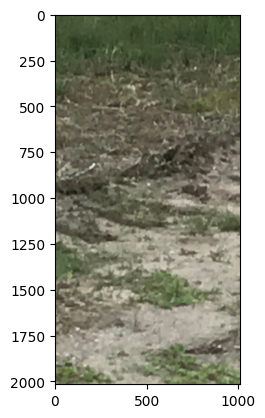

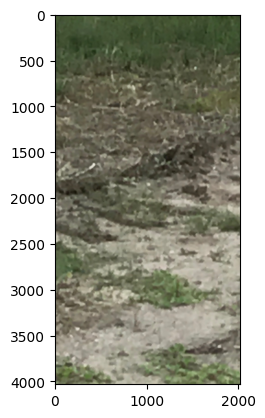

In [19]:
import cv2
import numpy as np

img = cv2.imread('cleansing_data/sample.jpg')

size = img.shape

# トリミング
my_img = img[: size[0]//2, : size[1]//3]

cv2.imshow('sample', my_img)

# リサイズ
my_img = cv2.resize(my_img, (my_img.shape[1] * 2, my_img.shape[0] * 2))

cv2.imshow('sample', my_img)

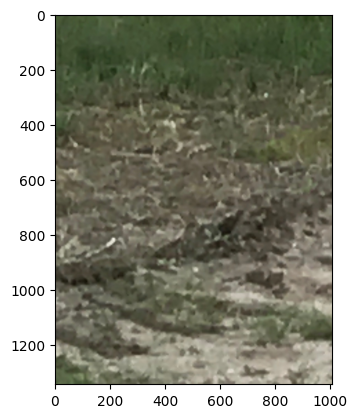

In [20]:
import cv2
import numpy as np

img = cv2.imread('cleansing_data/sample.jpg')

size = img.shape

# トリミング
my_img = img[: size[0]//3, : size[1]//3]

cv2.imshow('sample', my_img)

### 15.2.4 回転・反転

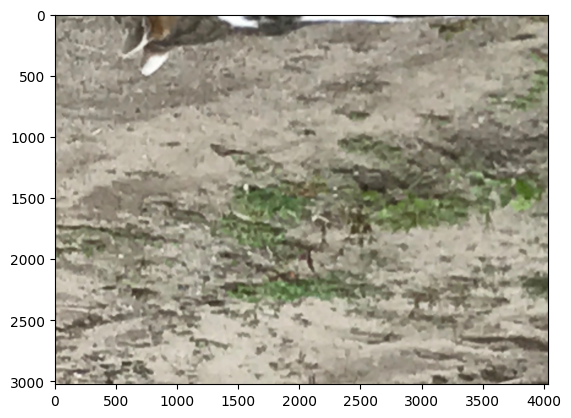

In [21]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2])/2), 180, 2.0)

my_img = cv2.warpAffine(img, mat, img.shape[:2])

cv2.imshow('sample', my_img)

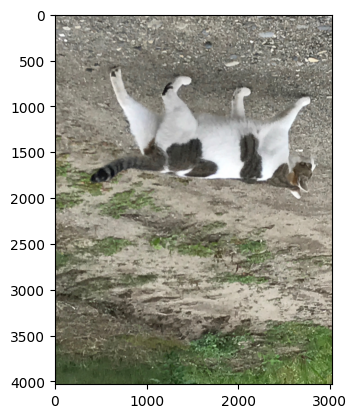

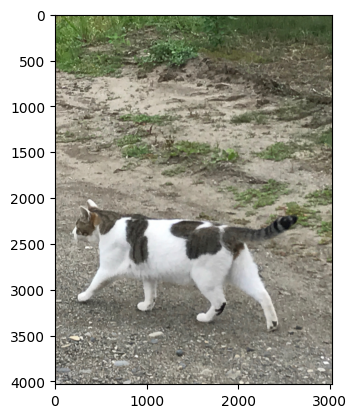

In [22]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

my_img = cv2.flip(img, 0)

cv2.imshow('sample', my_img)

my_img = cv2.flip(img, 1)

cv2.imshow('sample', my_img)

### 15.2.5 色調変換・色反転

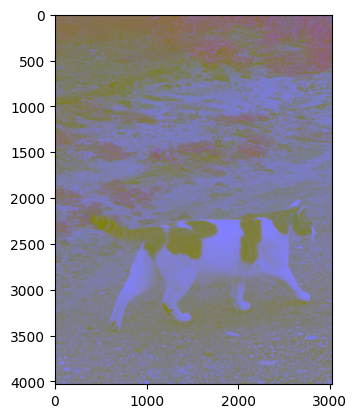

In [23]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

my_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

cv2.imshow('sample', my_img)

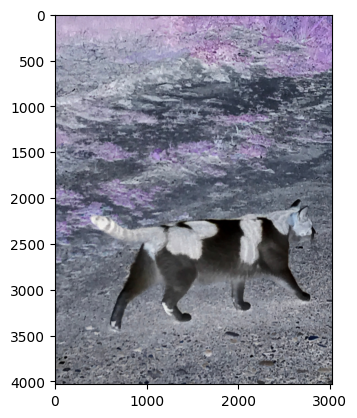

In [24]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            img[i][j][k] = 255 - img[i][j][k]

cv2.imshow('sample', img)

## 15.3 OpenCVの利用

### 15.3.1 閾値処理（2値化）

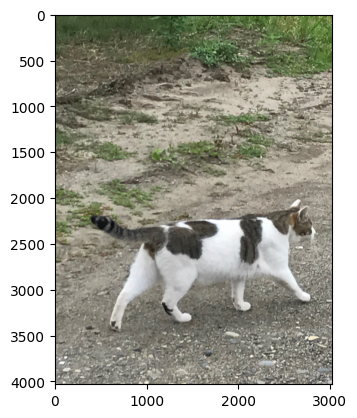

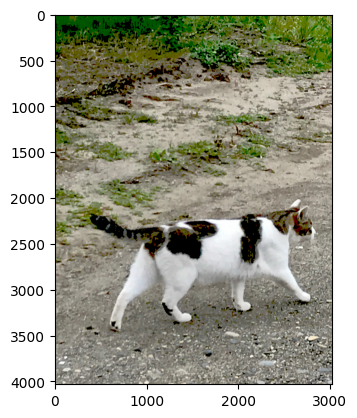

In [25]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

retval, my_img = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)

cv2.imshow('sample', img)
cv2.imshow('sample', my_img)

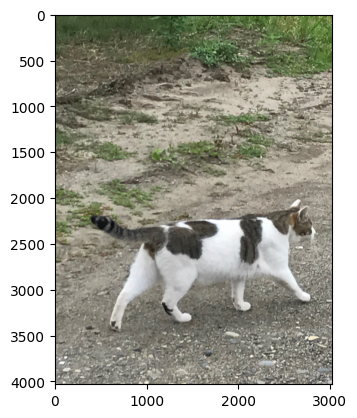

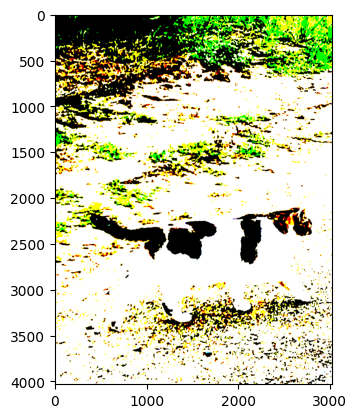

In [26]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

retval, my_img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('sample', img)
cv2.imshow('sample', my_img)

### 15.3.2 マスキング

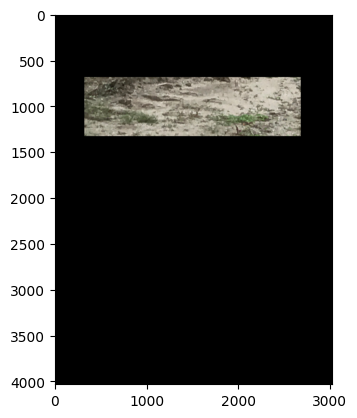

In [35]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

mask = cv2.imread('cleansing_data/mask.png', 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

my_img = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('sample', my_img)

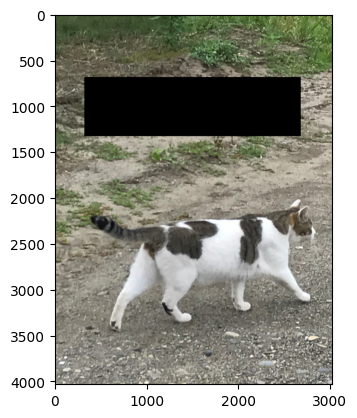

In [38]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

mask = cv2.imread('cleansing_data/mask.png', 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

retval, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)

my_img = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('sample', my_img)

### 15.3.3 ぼかし

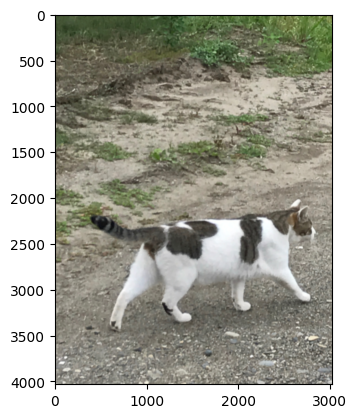

In [43]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

my_img = cv2.GaussianBlur(img, (21, 21), 0)

cv2.imshow('sample', my_img)

### 15.3.4 ノイズの除去

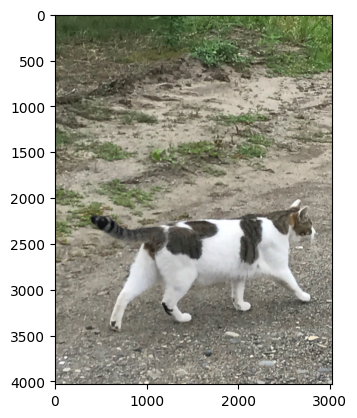

In [45]:
import numpy as np
import cv2


img = cv2.imread('cleansing_data/sample.jpg')

my_img = cv2.fastNlMeansDenoisingColored(img)

cv2.imshow('sample', my_img)

### 15.3.5 膨張・収縮

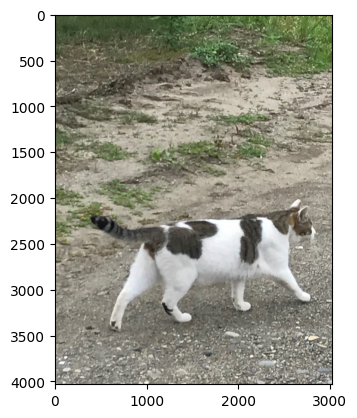

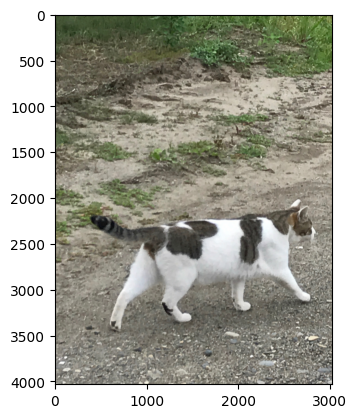

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('cleansing_data/sample.jpg')

filt = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
],
np.uint8)

my_img = cv2.dilate(img, filt)

cv2.imshow('sample', my_img)

my_img = cv2.erode(img, filt)

cv2.imshow('sample', my_img)